<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Camion_de_Transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas. El peso de cada tina sigue la siguiente distribución de probabilidad: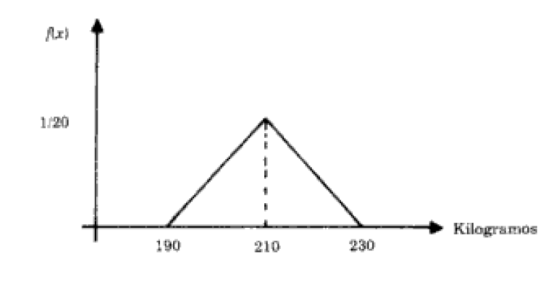

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?  
- (a) Resolver analíticamente. 
- (b) Resolver por simulación.

## (a)

Primero hallamos la función de distribución de probabilidad con la que se distribuyen los pesos, para ello, podemos ver que: 

Sean $X_i$ los pesos de cada uno de los artículos, se distribuyen como:


$X_i \thicksim Tri(190,230,210)$

Sin embargo, podemos tomar la distribucion como dos rectas, con la siguiente forma: 

- $f_1(x) = \frac{1}{400} (x-190)$ 

- $f_2(x) =  \frac{1}{400} (230-x)$ 

Esto ya que podemos ver la funcion como dos distribuciones diferentes, dividiendolas a traves de la media, y a partir de ello, escribirlas como dos distribuciones que siguen una recta

Podemos escribir la funcion de densidad de probabilidad como:

$f(x)= \left\{ \begin{array}{lcc} \frac{1}{400} (x-190) & si & 190 \leq x \leq 210 \\ \\ \frac{1}{400} (230-x) & si & 210 < x  \leq 230 \\ \end{array} \right.$

Ahora, calculando $\mu = E[x]$ y $\sigma^2 = var[x]$, utilizando las definiciones:

- $\mu = E[x] = \int _a ^b xf(x)$ $dx$

- $\sigma^2 = var[x] = \int _a^b (x-\mu)^2 f(x) $ $dx$

$\mu = E[x] = \int_{190}^{230} xf(x) dx = \frac{1}{400} \int_{190}^{210} (x^2 -190x) dx + \frac{1}{400} \int_{210}^{230} (230x - x^2) dx = \frac{1}{400} (\int_{190}^{210} x^2 dx - 190 \int_{190}^{210} x dx + 230 \int_{210}^{230} x dx - \int_{210}^{230} x^2 dx) = \frac{1}{400} [(\frac{(210)^3}{3} - \frac{(190)^3}{3}) - 190 (\frac{(210)^2}{2} - \frac{(190)^2}{2}) + 230(\frac{(230)^2}{2} - \frac{(210)^2}{2}) - (\frac{(230)^3}{3} - \frac{(210)^3}{3})] = \frac{1}{400}(84000) = 210$

$\sigma^2 = var[x] = \int_{190}^{230} (x-210)^2 f(x) dx = \frac{1}{400} [\int_{190}^{210} (x-210)^2 (x - 190) dx + \int_{210}^{230} (x-210)^2 (230 - x) dx] = \frac{200}{3}$

Dado que tenemos 5 articulos $X_1,X_2,X_3,X_4,X_5$ con su respectivo peso, buscamos la probabilidad: 

$P(X_1 + X_2 + X_3 + X_4 + X_5) > 1000$

Usando el teorema central del limite, dado que empieza a ser valido para $n \geq 4$: 

$\lim_{n -> \infty} P(\frac{X_1 + ... + X_n - n \mu}{\sigma \sqrt{n}} < x) = \phi(X)$ con $X \thicksim N(\mu,\sigma)$ 

Para este problema: 

$P(\frac{X_1 + ... + X_5 - 5(210)}{\frac{200}{3} (\sqrt{5})}) < \frac{1000 -5(210)}{\sqrt{\frac{200}{3}} (\sqrt{5})}$

Llamando: 

$\frac{X_1 + ... + X_5 - 5(210)}{\frac{200}{3}(\sqrt{5})} = Z$

Buscamos:

$P(Z < -2.738)$

Recordando que si:

$X \thicksim N(\mu,\sigma)$ y $Z = \frac{X - \mu}{\sigma}$ entonces $Z \thicksim N(0,1)$

Y buscando en la tabla Z de distribucion normal:

$P(Z < -2.738) = 0.997 = 99.7\%$

## (b)

Para resolver este problema, aplicaremos transformada inversa para obtener F^{-1}(U) y obtener la probabilidad empirica a traves de analizar cuando el peso de los 5 productos supera los 1000 kilogramos, primero incluimos librerias:

In [ ]:
import numpy as np #numpy para arreglos y operaciones matematicas
import random as rnd #Random para generar numeros aleatorios
import matplotlib.pyplot as plt #Matplotlib para cualquier grafica que necesitemos

La funcion inversa utilizada es:

$F^{-1}(U)= \left\{ \begin{array}{lcc} 190 + 20 \sqrt{2u} & si & 0 \leq u \leq \frac{1}{2} \\ \\ 230 - 20 \sqrt{2(1-u)} & si & \frac{1}{2} < u  \leq 1 \\ \end{array} \right.$

In [ ]:
def trian(a,b,c):
      u = rnd.uniform(0,1) #Generamos el numero aleatorio
      if u <= 0.5:
        x = 20 * np.sqrt(2*u) + a #Si el numero generado es menor o igual a 0.5, se evaluara el numero en esta funcion
      else:
        x = b - 20 * np.sqrt(2*(1-u)) #Si no, se evaluara en esta.
      return x

Ahora, realizamos el experimento para obtener la probabilidad empirica, generando 5 elementos para la muestra y verificar si se cumple la condicion de peso.

In [ ]:
def experimento1(n,a,b,c,trian):
  lista = [] #Aqui se guardaran las probabilidades empiricas obtenidas en cada realizacion del experimento
  costo = 0 #Inicializamos el costo de viaje en 0
  con = 0 #El contador de veces que los articulos exceden el peso
  for i in range(n):
    x1 = trian(a,b,c)
    x2 = trian(a,b,c)
    x3 = trian(a,b,c)
    x4 = trian(a,b,c)
    x5 = trian(a,b,c) #Generando 5 elementos de muestra para el experimento
    if x1 + x2 + x3 + x4 + x5 > 1000: #Verificando la condicion de peso
      con += 1
      costo += 200 #Se suma 1 vez que los productos han excedido el peso, se suma una vez el costo extra y se calcula la probabilidad empirica
      prob = con/(i+1)
      lista.append(prob)
    else:
      con = con
      costo = costo #No se cumple la condicion, se quedan las veces que se ha excedido el peso igual y no hay costo
      prob = con/(i+1)
      lista.append(prob)
  return lista,costo

Generamos los resultados del experimento, tanto la lista de probabilidades empiricas, como el costo generado total

In [ ]:
exp,costo = experimento1(100000,190,230,210,trian) #Realizamos el experimento 100000 veces y con los valores parametro de la funcion a,c,b

Graficamos el comportamiento de la funcion.

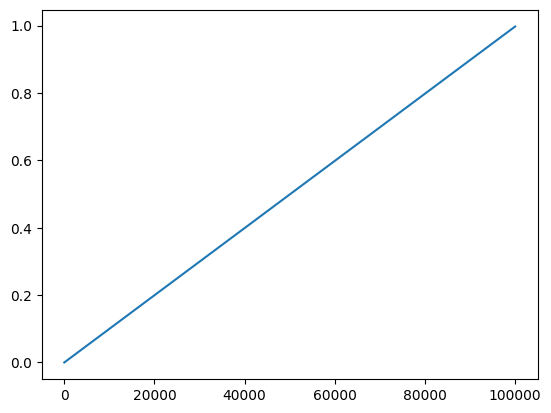

In [ ]:
plt.plot(exp)

Podemos ver que el comportamiento de la probabilidad se vuelve estable cerca de 1, justo como se esperaba por el resultado analitico obtenido, 

In [ ]:
exp[99999]

0.99768

# Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de 200. También suponga que el costo promedio anual de un nuevo camión es de 60, 000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?

## (a)

Si el coche solo se ocupa 5 dias a la semana, al año se ocupa:

$5(52) = 260$ dias

Haciendo una regla de tres y utilizando la probabilidad antes obtenida:

$Dias$ $de$ $operacion$ $del$ $coche$ $alquilado = \frac{(99.7)(260)}{100} = 259$ $dias$

Entonces el costo total de alquiler del coche sera:

$Costo$ $= 259(200) = $ $51,800$ pesos

Conviene mas el coche alquilado.

## (b)

Solo añadimos al codigo anterior la suma del costo,repitiendo 100000 veces y vemos que obtenemos:

In [ ]:
exp1,costo1 = experimento1(100000,190,230,210,trian)
costo1

19944600

100000 dias son aproximadamente 274 años, entonces el costo de un nuevo camion anual es de:

$60000(274) = 16440000$

Para la simulacion de 100000 dias, sale mas rentable comprar un nuevo camion.